In [1]:
%matplotlib inline


from neuron import h
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import h5py
import os

from cell_inference.utils.plotting.plot_results import plot_lfp_traces, plot_lfp_heatmap
from cell_inference.utils.feature_extractors.SummaryStats2D import calculate_stats, build_lfp_grid
from cell_inference.cells.stylizedcell import CellTypes
from cell_inference.cells.activecell import ActiveCell
from cell_inference.cells.passivecell import PassiveCell
from cell_inference.cells.simulation import Simulation
from cell_inference.utils.currents.recorder import Recorder
from cell_inference.config import paths, params
from cell_inference.utils.feature_extractors.parameterprediction import ClassifierTypes, ClassifierBuilder

cell_type = CellTypes.ACTIVE

h.nrn_load_dll(paths.COMPILED_LIBRARY)
geo_standard = pd.read_csv(paths.GEO_STANDARD,index_col='id')
h.tstop = params.TSTOP
h.dt = params.DT

In [2]:
DATA_PATH = 'cell_inference/resources/simulation_data'
TRIAL_PATH = os.path.join(DATA_PATH, 'Loc3_Ori2_Geo1_params')

LFP_PATH = os.path.join(TRIAL_PATH, 'lfp.npz')  # LFP and labels

lfp   = np.load(LFP_PATH)['x']
print(lfp.shape)
labels = np.load(LFP_PATH)['y']
summ_stats = []
for i in range(lfp.shape[0]):
    g_lfp, _ = build_lfp_grid(lfp[i], params.ELECTRODE_POSITION)
    summ_stats.append(calculate_stats(g_lfp))
summ_stats = np.array(summ_stats)

(1000, 176, 384)


In [3]:
from cell_inference.utils.feature_extractors.helperfunctions import train_regression, build_dataloader_from_numpy

data = summ_stats
print(data.shape)

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=2)

(1000, 40)


In [4]:
from cell_inference.utils.feature_extractors.fullyconnectednetwork import FullyConnectedNetwork, ActivationTypes
from cell_inference.utils.feature_extractors.convolutionalnetwork import ConvolutionalNetwork
import torch

# model1 = ConvolutionalNetwork(in_channels=1, num_labels=2)
# model1 = torch.load('cell_inference/resources/results/pytorch_models/16_23_59__01_04_2022.pt')
model1 = FullyConnectedNetwork(in_features=40, out_features=6)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #torch.device("cpu")
model1.to(device)

train_regression(model1, train_loader, test_loader, 300, learning_rate=0.001, decay_rate=0.99, device=device)

  0%|          | 1/300 [00:01<05:40,  1.14s/it]

Training Loss: 35832482.44433594 Validation Loss: 4072818.004638672


  4%|▎         | 11/300 [00:11<04:55,  1.02s/it]

Training Loss: 2747367.6993103027 Validation Loss: 1537523.7580566406


  7%|▋         | 21/300 [00:21<04:43,  1.02s/it]

Training Loss: 1718702.3067626953 Validation Loss: 809880.6771240234


 10%|█         | 31/300 [00:30<04:08,  1.08it/s]

Training Loss: 1438104.4367370605 Validation Loss: 474488.5285644531


 14%|█▎        | 41/300 [00:40<04:26,  1.03s/it]

Training Loss: 1198292.209136963 Validation Loss: 378718.6294555664


 17%|█▋        | 51/300 [00:50<04:15,  1.03s/it]

Training Loss: 1045523.202331543 Validation Loss: 348981.63035583496


 20%|██        | 61/300 [01:00<04:02,  1.01s/it]

Training Loss: 930981.4212188721 Validation Loss: 487566.72134399414


 24%|██▎       | 71/300 [01:11<03:54,  1.02s/it]

Training Loss: 848221.4555969238 Validation Loss: 483978.2432861328


 27%|██▋       | 81/300 [01:21<03:46,  1.03s/it]

Training Loss: 757979.6482849121 Validation Loss: 375806.5920410156


 30%|███       | 91/300 [01:31<03:32,  1.02s/it]

Training Loss: 659378.376663208 Validation Loss: 283444.3935546875


 34%|███▎      | 101/300 [01:41<03:22,  1.02s/it]

Training Loss: 584687.2505950928 Validation Loss: 258429.47120666504


 37%|███▋      | 111/300 [01:52<03:14,  1.03s/it]

Training Loss: 545312.5584106445 Validation Loss: 244507.40438842773


 40%|████      | 121/300 [02:02<03:02,  1.02s/it]

Training Loss: 519254.91387939453 Validation Loss: 238279.0470275879


 44%|████▎     | 131/300 [02:10<02:18,  1.22it/s]

Training Loss: 474950.47981262207 Validation Loss: 244474.1275024414


 47%|████▋     | 141/300 [02:20<02:39,  1.00s/it]

Training Loss: 450089.688369751 Validation Loss: 238851.57537841797


 50%|█████     | 151/300 [02:30<02:33,  1.03s/it]

Training Loss: 424358.52864074707 Validation Loss: 234179.8973388672


 54%|█████▎    | 161/300 [02:40<02:21,  1.01s/it]

Training Loss: 397486.69047546387 Validation Loss: 226504.89672851562


 57%|█████▋    | 171/300 [02:50<02:11,  1.02s/it]

Training Loss: 367826.1113128662 Validation Loss: 225217.44888305664


 60%|██████    | 181/300 [03:01<02:02,  1.03s/it]

Training Loss: 340195.12100219727 Validation Loss: 223566.25604248047


 64%|██████▎   | 191/300 [03:11<01:51,  1.03s/it]

Training Loss: 322497.496963501 Validation Loss: 222683.0196685791


 67%|██████▋   | 201/300 [03:21<01:41,  1.02s/it]

Training Loss: 294415.4549484253 Validation Loss: 219237.367477417


 70%|███████   | 211/300 [03:32<01:33,  1.05s/it]

Training Loss: 275368.8642883301 Validation Loss: 215329.9087524414


 74%|███████▎  | 221/300 [03:42<01:22,  1.04s/it]

Training Loss: 257110.31498718262 Validation Loss: 204879.82063293457


 77%|███████▋  | 231/300 [03:52<01:11,  1.03s/it]

Training Loss: 239974.65742111206 Validation Loss: 200944.98797607422


 80%|████████  | 241/300 [04:03<01:00,  1.03s/it]

Training Loss: 224981.36016845703 Validation Loss: 196951.92039489746


 84%|████████▎ | 251/300 [04:13<00:50,  1.04s/it]

Training Loss: 212903.08744049072 Validation Loss: 197028.40715026855


 87%|████████▋ | 261/300 [04:23<00:39,  1.02s/it]

Training Loss: 203577.8821105957 Validation Loss: 197623.79109954834


 90%|█████████ | 271/300 [04:34<00:30,  1.04s/it]

Training Loss: 195657.66469573975 Validation Loss: 196931.07775878906


 94%|█████████▎| 281/300 [04:43<00:18,  1.03it/s]

Training Loss: 188289.11713790894 Validation Loss: 196031.95542907715


 97%|█████████▋| 291/300 [04:53<00:09,  1.01s/it]

Training Loss: 182584.53325271606 Validation Loss: 193911.26390075684


100%|██████████| 300/300 [05:02<00:00,  1.01s/it]


In [5]:
from sklearn.metrics import r2_score

train_loader, test_loader = build_dataloader_from_numpy(input_arr=data, labels_arr=labels, batch_size=128)

x, y = next(iter(test_loader))
model1.eval()
x = x.to(device)
output = model1(x)
output = output.to("cpu").detach().numpy()
y = y.to("cpu").detach().numpy()
print("R2: {}".format(r2_score(y, output)))
print(output.shape)
print(y.shape)

R2: 0.21925272860910705
(128, 6)
(128, 6)


<IPython.core.display.Javascript object>


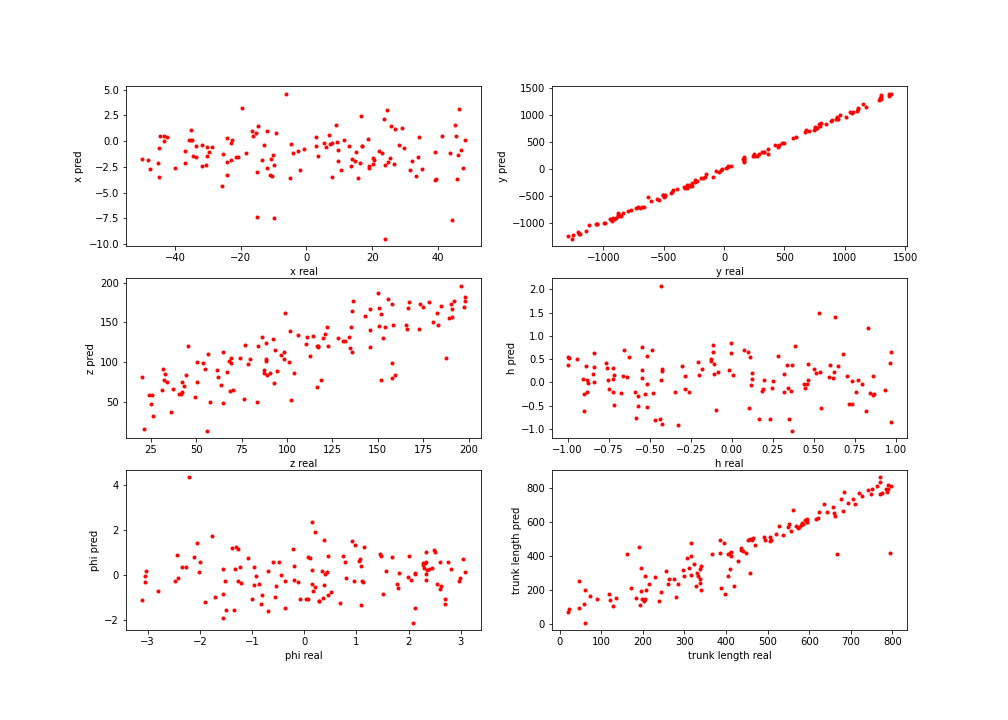

In [8]:
%matplotlib notebook

idx = 0

plt.figure(figsize=(14, 10))
#inf_list = ['r_s', 'l_t', 'r_t', 'r_d', 'r_tu', 'l_d']

ax_s = plt.subplot(321)
ax_s.scatter(y[:,0], output[:,0], c='red', marker='.')
ax_s.set_xlabel('x real')
ax_s.set_ylabel('x pred')

ax_t = plt.subplot(322)
ax_t.scatter(y[:,1], output[:,1], c='red', marker='.')
ax_t.set_xlabel('y real')
ax_t.set_ylabel('y pred')

ax_t = plt.subplot(323)
ax_t.scatter(y[:,2], output[:,2], c='red', marker='.')
ax_t.set_xlabel('z real')
ax_t.set_ylabel('z pred')

ax_t = plt.subplot(324)
ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
ax_t.set_xlabel('h real')
ax_t.set_ylabel('h pred')

ax_t = plt.subplot(325)
ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
ax_t.set_xlabel('phi real')
ax_t.set_ylabel('phi pred')

ax_t = plt.subplot(326)
ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
ax_t.set_xlabel('trunk length real')
ax_t.set_ylabel('trunk length pred')

# ax_t = plt.subplot(324)
# ax_t.scatter(y[:,3], output[:,3], c='red', marker='.')
# ax_t.set_xlabel('dendrite radius real')
# ax_t.set_ylabel('dendrite radius pred')

# ax_t = plt.subplot(325)
# ax_t.scatter(y[:,4], output[:,4], c='red', marker='.')
# ax_t.set_xlabel('tuft radius real')
# ax_t.set_ylabel('tuft radius pred')

# ax_t = plt.subplot(326)
# ax_t.scatter(y[:,5], output[:,5], c='red', marker='.')
# ax_t.set_xlabel('dendrite length real')
# ax_t.set_ylabel('dendrite length pred')

plt.show()

<IPython.core.display.Javascript object>


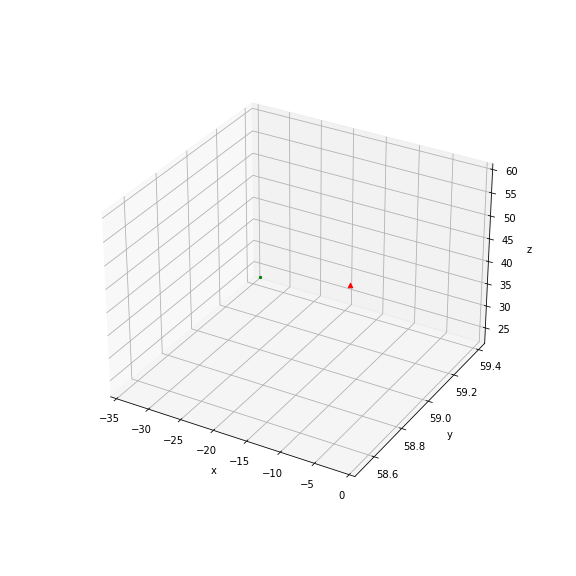

Text(0.5, 0, 'z')

In [7]:
%matplotlib notebook

idx = 0#[0, 1, 2, 3, 4, 5]

plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(y[idx,0], y[idx,1], y[idx,2], c='green', marker='.')
ax.scatter3D(output[idx,0], output[idx,1], output[idx,2], c='red', marker='^')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# plt.show()